# Sentiment Analysis on Twitter Posts Using Machine Learning
## Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

## Read the Twitter Data

In [2]:
df = pd.read_csv('Artificial_Intelligence.csv')

### Display the First Five Rows of the Dataset

In [3]:
df.head()

,date,user,content,id,replyCount,retweetCount,likeCount,quoteCount,hashtags,lang,links,media
0,2023-05-21 01:14:02+00:00,"{'_type': 'snscrape.modules.twitter.User', 'us...",'Heart wrenching': #AI #expert details #danger...,1660091546161627139,0,0,0,0,"['AI', 'expert', 'dangers', 'deepfakes', 'dete...",en,[{'_type': 'snscrape.modules.twitter.TextLink'...,"[{'_type': 'snscrape.modules.twitter.Photo', '..."
1,2023-05-21 01:02:38+00:00,"{'_type': 'snscrape.modules.twitter.User', 'us...",When the Default happens #DebtCeilingCrisis YE...,1660088677630976000,0,0,0,0,"['DebtCeilingCrisis', 'ArtificialIntelligence']",en,NaN,NaN
2,2023-05-21 01:01:27+00:00,"{'_type': 'snscrape.modules.twitter.User', 'us...",Checkout the latest updates from David Estrada...,1660088378816184321,0,0,0,0,"['EZEEBUY', 'SEE_OPEN_BUY', 'AIaaS', 'Innovati...",en,[{'_type': 'snscrape.modules.twitter.TextLink'...,NaN
3,2023-05-21 00:59:01+00:00,"{'_type': 'snscrape.modules.twitter.User', 'us...",Opinion: #CambridgeAnalytica on steroids: \n\n...,1660087769895452672,0,0,0,0,"['CambridgeAnalytica', 'ArtificialIntelligence...",en,[{'_type': 'snscrape.modules.twitter.TextLink'...,"[{'_type': 'snscrape.modules.twitter.Photo', '..."
4,2023-05-21 00:58:14+00:00,"{'_type': 'snscrape.modules.twitter.User', 'us...",This nimble quadruped is designed to be a pet ...,1660087570141724675,0,1,4,1,"['Robot', 'AI', 'ArtificialIntelligence', 'MI'...",en,NaN,"[{'_type': 'snscrape.modules.twitter.Video', '..."


### Dataset Information Overview

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5536 entries, 0 to 5535
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          5536 non-null   object
 1   user          5536 non-null   object
 2   content       5536 non-null   object
 3   id            5536 non-null   int64 
 4   replyCount    5536 non-null   int64 
 5   retweetCount  5536 non-null   int64 
 6   likeCount     5536 non-null   int64 
 7   quoteCount    5536 non-null   int64 
 8   hashtags      5536 non-null   object
 9   lang          5536 non-null   object
 10  links         3569 non-null   object
 11  media         2674 non-null   object
dtypes: int64(5), object(7)
memory usage: 519.1+ KB


### Check for Missing Values in the Dataset

In [5]:
df.isnull().sum()

date               0
user               0
content            0
id                 0
replyCount         0
retweetCount       0
likeCount          0
quoteCount         0
hashtags           0
lang               0
links           1967
media           2862
dtype: int64

### Display Column Names of the Dataset

In [6]:
df.columns

Index(['date', 'user', 'content', 'id', 'replyCount', 'retweetCount',
       'likeCount', 'quoteCount', 'hashtags', 'lang', 'links', 'media'],
      dtype='object')

### Rename and Select Relevant Column from the Dataset

In [10]:
# Rename the 'content' column to 'text' for easier reference
text_df = text_df.rename(columns={'content': 'text'})
# Keep only the 'text' column
text_df = text_df[['text']]
print(text_df.head())

                                                text
0  'Heart wrenching': #AI #expert details #danger...
1  When the Default happens #DebtCeilingCrisis YE...
2  Checkout the latest updates from David Estrada...
3  Opinion: #CambridgeAnalytica on steroids: \n\n...
4  This nimble quadruped is designed to be a pet ...


### Display Sample Text Data from the Dataset

In [13]:
# Rename 'content' to 'text' for consistency
text_df = text_df.rename(columns={'content': 'text'})
# Print sample rows
print(text_df['text'].iloc[0], "\n")
print(text_df['text'].iloc[1], "\n")
print(text_df['text'].iloc[2], "\n")
print(text_df['text'].iloc[3], "\n")
print(text_df['text'].iloc[4], "\n")

'Heart wrenching': #AI #expert details #dangers of #deepfakes 

and tools to #detect manipulated content 

https://t.co/MFo7Y6fYXX #fintech #ArtificialIntelligence #MachineLearning #DeepLearning #GenerativeAI #cybersecurity @kendall_tietz https://t.co/xBst16NWMi 

When the Default happens #DebtCeilingCrisis YES people will lose their jobs and many things will spin out of control in the short-term. Let us not forget that the long-term is most important. Perhaps, one day #ArtificialIntelligence could help us be more efficient in the future. 

Checkout the latest updates from David Estrada at EZEEBUY

https://t.co/CMOv21kBQZ

#EZEEBUY #SEE_OPEN_BUY #AIaaS #Innovative #Retail #Shopping #Experiences #Made #Frictionless #SocialMedia #ArtificialIntelligence #BrickAndMortars #Retailers 

Opinion: #CambridgeAnalytica on steroids: 

#ArtificialIntelligence is about to change our #democracy 

https://t.co/alqWe8oA04 #fintech #AI #MachineLearning #DeepLearning #GenerativeAI @paulwaugh @theipaper @

In [14]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5536 entries, 0 to 5535
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5536 non-null   object
dtypes: object(1)
memory usage: 43.4+ KB


### Text Data Preprocessing Function

In [15]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [16]:
text_df.text = text_df['text'].apply(data_processing)

#### Stemming Function

In [17]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

### Apply Stemming and Display Updated Text Data

In [18]:
text_df['text'] = text_df['text'].apply(lambda x: stemming(x))

In [19]:
text_df.head()

,text
0,heart wrenching ai expert details dangers deep...
1,default happens debtceilingcrisis yes people l...
2,checkout latest updates david estrada ezeebuy ...
3,opinion cambridgeanalytica steroids artificial...
4,nimble quadruped designed pet robot dog thesun...


### Display Sample Text Data After Stemming

In [20]:
print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

heart wrenching ai expert details dangers deepfakes tools detect manipulated content fintech artificialintelligence machinelearning deeplearning generativeai cybersecurity kendall_tietz 

default happens debtceilingcrisis yes people lose jobs many things spin control shortterm let us forget longterm important perhaps one day artificialintelligence could help us efficient future 

checkout latest updates david estrada ezeebuy ezeebuy see_open_buy aiaas innovative retail shopping experiences made frictionless socialmedia artificialintelligence brickandmortars retailers 

opinion cambridgeanalytica steroids artificialintelligence change democracy fintech ai machinelearning deeplearning generativeai paulwaugh theipaper julez_norton kalydeoo asokan_telecom swmuc enilev xbond49 ahier 

nimble quadruped designed pet robot dog thesun ai artificialintelligence mi robotics cc bigdata patrickgunz_ch ravikikan 



In [21]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5536 entries, 0 to 5535
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5536 non-null   object
dtypes: object(1)
memory usage: 43.4+ KB


### Calculate and Display Sentiment Polarity

In [22]:
def polarity(text):
    return TextBlob(text).sentiment.polarity
text_df['polarity'] = text_df['text'].apply(polarity)
text_df.head(10)    

,text,polarity
0,heart wrenching ai expert details dangers deep...,0.0
1,default happens debtceilingcrisis yes people l...,0.3
2,checkout latest updates david estrada ezeebuy ...,0.5
3,opinion cambridgeanalytica steroids artificial...,0.0
4,nimble quadruped designed pet robot dog thesun...,0.0
5,checkout latest updates david estrada ezeebuy ...,0.5
6,another nail coffin adobe photoshop ai aigener...,0.0
7,uk schools left confused fast rate change arti...,-0.2
8,openais ceo balances ai development risk tech ...,0.0
9,visit website write us infoexibexcom financial...,0.0


### Sentiment Classification Function

In [120]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"
text_df['sentiment'] = text_df['polarity'].apply(sentiment)
text_df.head()

,text,polarity,sentiment
0,heart wrenching ai expert details dangers deep...,0.0,Neutral
1,default happens debtceilingcrisis yes people l...,0.3,Positive
2,checkout latest updates david estrada ezeebuy ...,0.5,Positive
3,opinion cambridgeanalytica steroids artificial...,0.0,Neutral
4,nimble quadruped designed pet robot dog thesun...,0.0,Neutral


### Sentiment Distribution Visualization

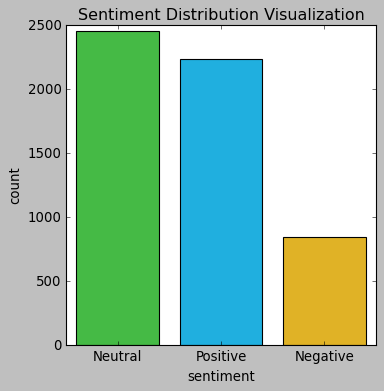

In [121]:
fig = plt.figure(figsize=(5, 5))
custom_palette = {'Negative': '#FFC107', 'Positive': '#00BFFF', 'Neutral': '#32CD32'}
sns.countplot(x='sentiment', data=text_df, palette=custom_palette)
plt.title("Sentiment Distribution Visualization")
plt.show()

### Pie Chart of Sentiment Distribution

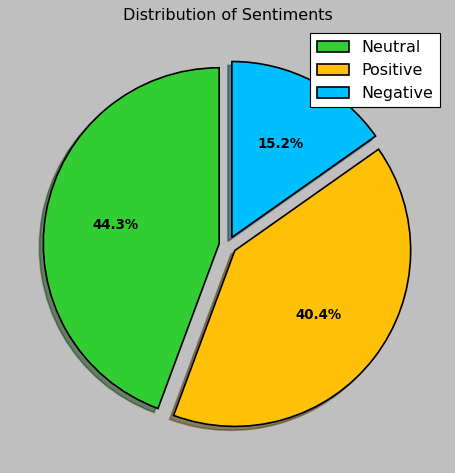

In [122]:
fig, ax = plt.subplots(figsize=(6, 6))  # Medium chart size
colors = ["#32CD32", "#FFC107", "#00BFFF"]  # Light green, yellow, sky blue
wp = {'linewidth': 1.5, 'edgecolor': "black"}  
tags = text_df['sentiment'].value_counts()
explode = (0.05, 0.05, 0.05)  # Subtle explode for better separation

# Plot the pie chart
patches, texts, autotexts = ax.pie(
    tags, autopct='%1.1f%%', shadow=True, colors=colors,
    startangle=90, wedgeprops=wp, explode=explode
)
# Set text aesthetics
for text in texts:
    text.set_fontsize(10)
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontweight('bold')

plt.title('Distribution of Sentiments')
plt.legend(tags.index, loc='upper right')  # Tags for clarity
plt.tight_layout()
plt.show()

### Display Top Positive Tweets

In [33]:
pos_tweets = text_df[text_df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

,text,polarity,sentiment
4846,universities best prepare generative ai tech r...,1.0,Positive
2194,tried 84 chatgpt plugins best ai machinelearni...,1.0,Positive
5488,discover best artificialintelligence tool job ...,1.0,Positive
3529,best ai tools boost productivity artificialint...,1.0,Positive
1455,discover best artificialintelligence tool job ...,1.0,Positive


### Install WordCloud Library
This statement installs the wordcloud library, which is used to generate word cloud visualizations, helping to display the most frequent words in a text dataset in an aesthetically appealing way.

In [37]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [38]:
print(text_df['sentiment'].value_counts())

sentiment
Neutral     2455
Positive    2238
Negative     843
Name: count, dtype: int64


## Word Cloud Visualization for Positive Tweets

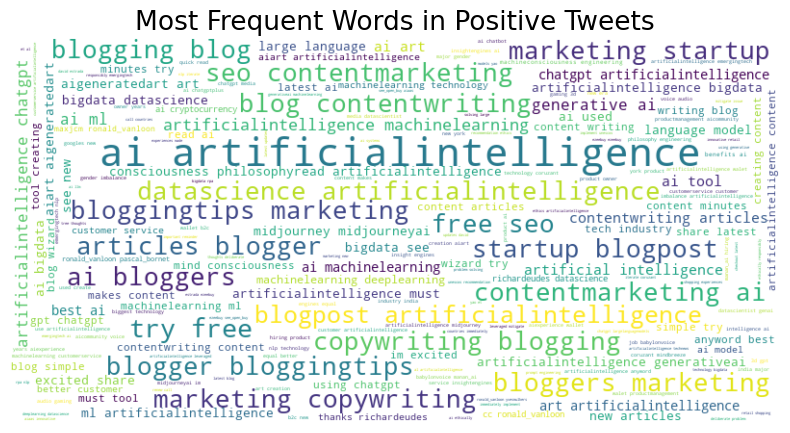

In [43]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Normalize sentiments for case and space sensitivity
text_df['sentiment'] = text_df['sentiment'].str.strip().str.lower()

# Fallback if no positive sentiments
if 'positive' in text_df['sentiment'].values:
    positive_texts = " ".join(text_df[text_df['sentiment'] == 'positive']['text'])
else:
    print("No positive tweets found. Using all tweets instead.")
    positive_texts = " ".join(text_df['text'])

# Generate the word cloud
if positive_texts.strip():  # Check if there's valid text
    wordcloud = WordCloud(
        width=800, 
        height=400, 
        background_color='white',
        colormap='viridis',
        max_words=200
    ).generate(positive_texts)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title('Most Frequent Words in Positive Tweets', fontsize=19)
    plt.show()
else:
    print("No valid text to generate a word cloud.")

### Display Top Negative Tweets

In [47]:
pos_tweets = text_df[text_df.sentiment == 'negative']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

,text,polarity,sentiment
1959,chatgpt revolutionizing way interact ai answer...,-0.0125,negative
1244,chatgpt revolutionizing way interact ai answer...,-0.0125,negative
4125,chatgpt revolutionizing way interact ai answer...,-0.0125,negative
3399,chatgpt revolutionizing way interact ai answer...,-0.0125,negative
527,chatgpt revolutionizing way interact ai answer...,-0.0125,negative


### Word Cloud Visualization for Negative Tweets

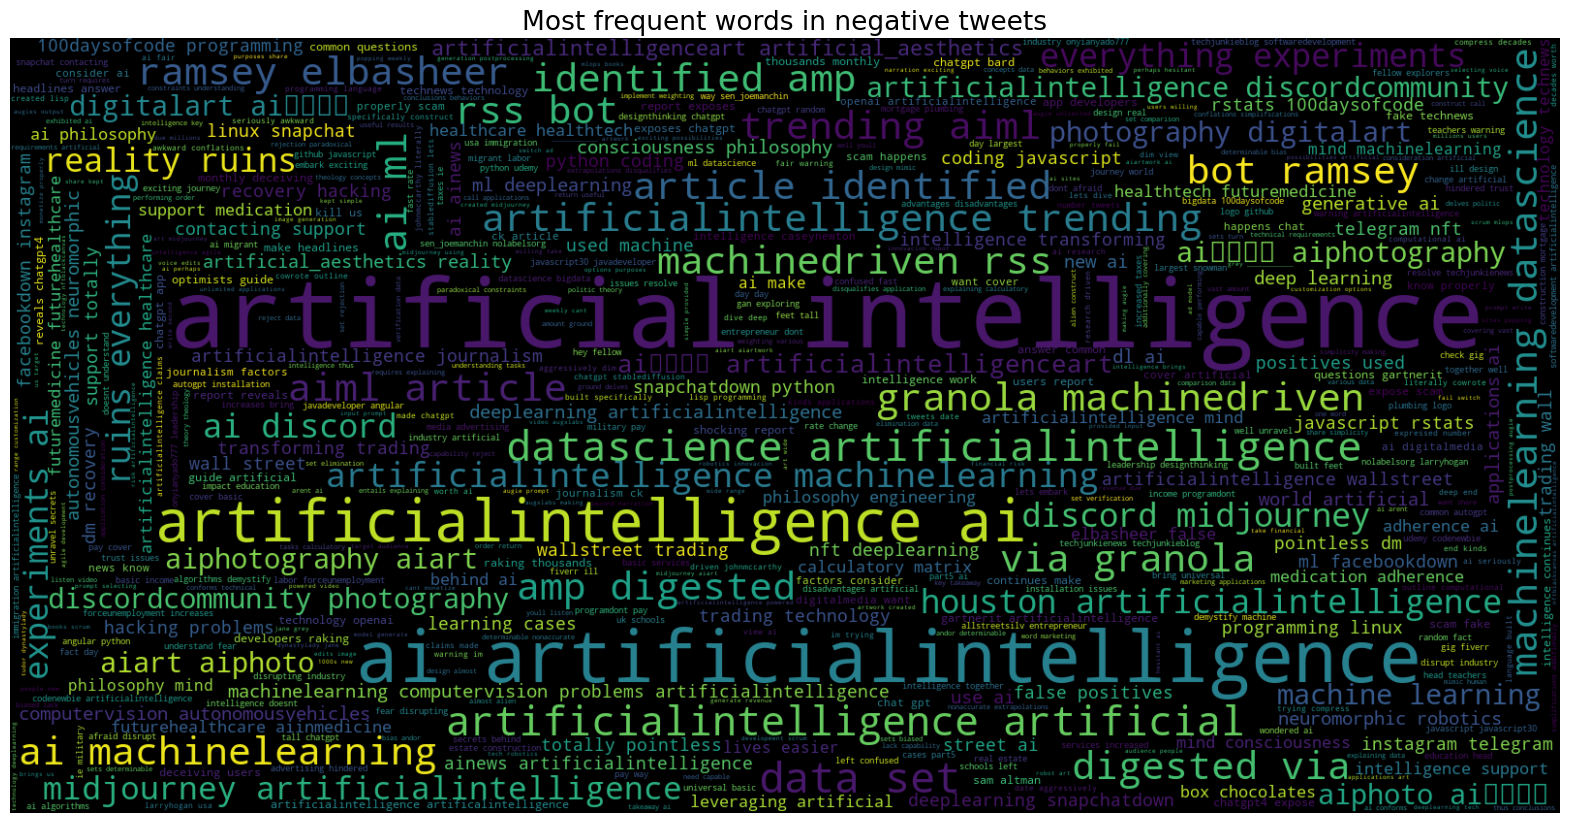

In [48]:
text = ' '.join([word for word in neg_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

### Display Top Neutral Tweets

In [51]:
neutral_tweets = text_df[text_df.sentiment == 'neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

,text,polarity,sentiment
0,heart wrenching ai expert details dangers deep...,0.0,neutral
3672,ai transformed ed fowler timothy hughes via dl...,0.0,neutral
3653,5212023 chuckie ai artificialintelligence what...,0.0,neutral
3654,despite concerns students using chatgpt submit...,0.0,neutral
3657,join manufacturing summit mumbai 23 june hear ...,0.0,neutral


### Word Cloud Visualization for Neutral Tweets

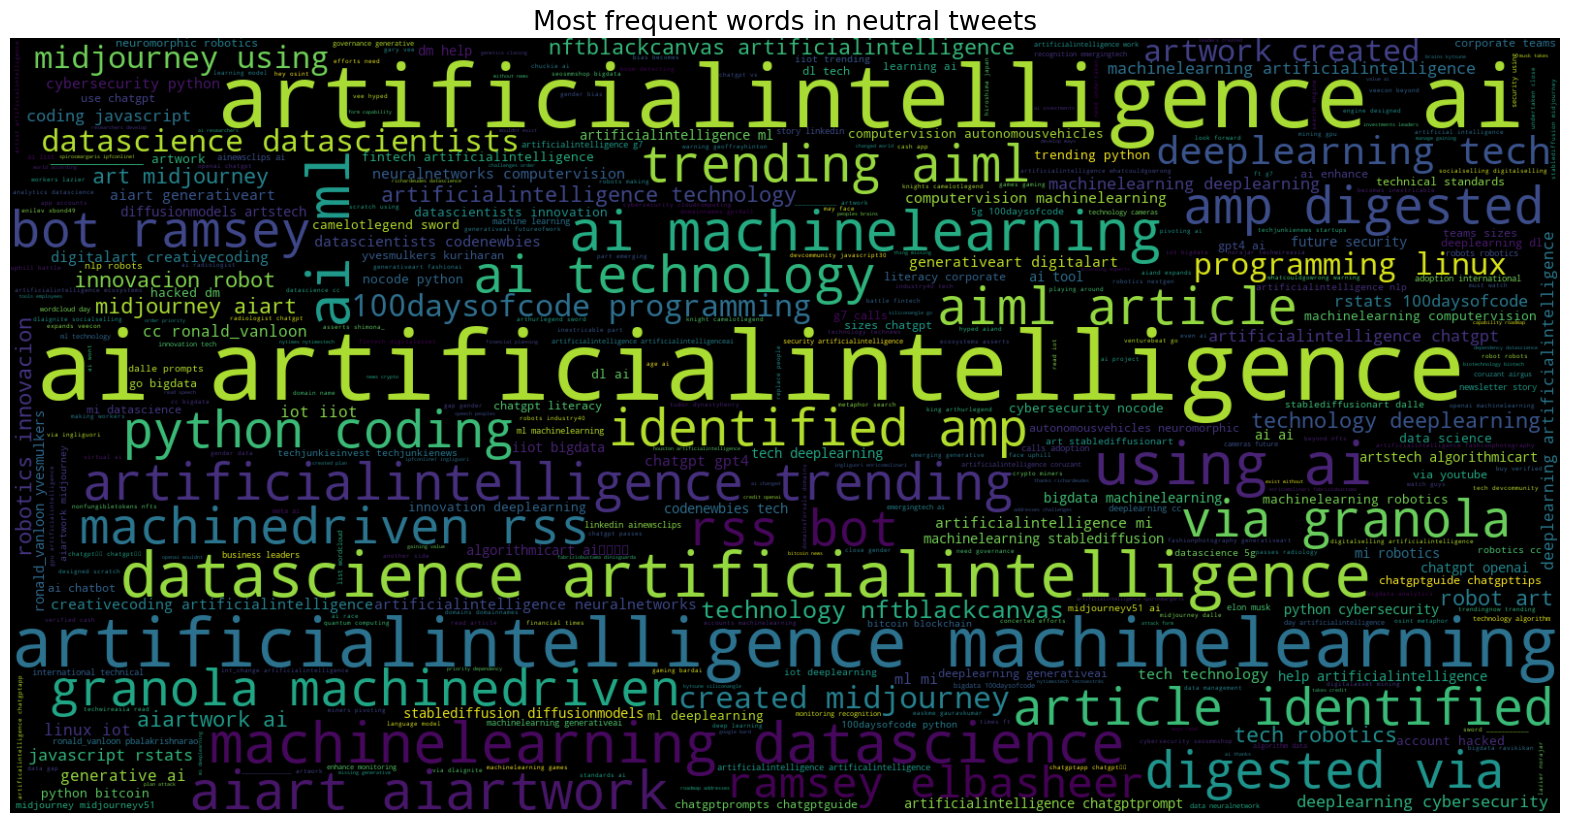

In [52]:
text = ' '.join([word for word in neutral_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show()

### Extract and Display Text Features Using CountVectorizer

In [62]:
vect = CountVectorizer(ngram_range=(1, 2)).fit(text_df['text'])
feature_names = vect.get_feature_names_out()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

Number of features: 13080

First 20 features:
 ['10' '10 algorithms' '10 free' '10 hadnt' '10 used' '10 years' '100'
 '100 years' '1000s' '1000s new' '1000xgem' '100daysofcode'
 '100daysofcode 100daysofhacking' '100daysofcode completed'
 '100daysofcode programming' '100daysofcode python' '100daysofcode rpa'
 '100daysofcode serverless' '100daysofcode techforgood' '100daysofcoding']


# Logistic Regression Model

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Use TF-IDF for better feature scaling
vect = TfidfVectorizer(ngram_range=(1, 1), min_df=5, max_features=1500)
X = vect.fit_transform(text_df['text'])

Y = text_df['sentiment']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

print("Size of x_train:", x_train.shape)
print("Size of y_train:", y_train.shape)
print("Size of x_test:", x_test.shape)
print("Size of y_test:", y_test.shape)

import warnings
warnings.filterwarnings('ignore')

# Logistic Regression with strong regularization
logreg = LogisticRegression(C=0.01, class_weight='balanced', max_iter=200)
logreg.fit(x_train, y_train)

# Predictions
logreg_pred = logreg.predict(x_test)

# Calculate accuracy
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc * 100))

Size of x_train: (4428, 1500)
Size of y_train: (4428,)
Size of x_test: (1108, 1500)
Size of y_test: (1108,)
Test accuracy: 87.00%


## Confusion Matrix and Classification Report

In [69]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[133  17  19]
 [ 11 435  45]
 [ 12  40 396]]


              precision    recall  f1-score   support

    negative       0.85      0.79      0.82       169
     neutral       0.88      0.89      0.89       491
    positive       0.86      0.88      0.87       448

    accuracy                           0.87      1108
   macro avg       0.87      0.85      0.86      1108
weighted avg       0.87      0.87      0.87      1108



## Confusion Matrix Visualization

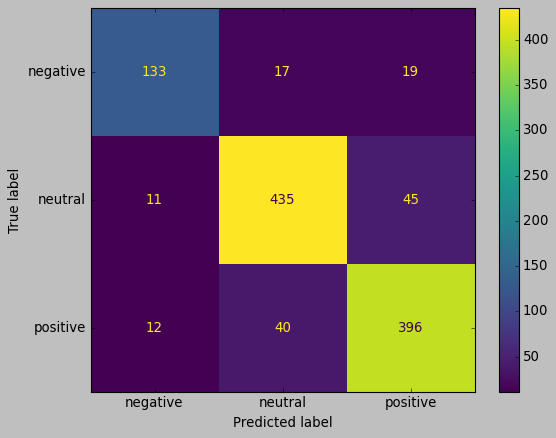

In [70]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()

## Logistic Regression with Hyperparameter Tuning

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV

# TF-IDF with fewer features
vect = TfidfVectorizer(ngram_range=(1, 2), max_features=500, stop_words='english')
X = vect.fit_transform(text_df['text'])

Y = text_df['sentiment']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

print("Size of x_train:", x_train.shape)
print("Size of y_train:", y_train.shape)
print("Size of x_test:", x_test.shape)
print("Size of y_test:", y_test.shape)

# Define parameter grid for Logistic Regression
param_grid = {'C': [0.005, 0.01, 0.05, 0.1]}
grid = GridSearchCV(LogisticRegression(class_weight='balanced', max_iter=200), param_grid)
grid.fit(x_train, y_train)

# Best hyperparameters
print("Best parameters:", grid.best_params_)

# Model evaluation
y_pred = grid.predict(x_test)
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc * 100))

Size of x_train: (4428, 500)
Size of y_train: (4428,)
Size of x_test: (1108, 500)
Size of y_test: (1108,)
Best parameters: {'C': 0.1}
Test accuracy: 84.75%


In [74]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[133  26  10]
 [ 15 429  47]
 [ 12  59 377]]


              precision    recall  f1-score   support

    negative       0.83      0.79      0.81       169
     neutral       0.83      0.87      0.85       491
    positive       0.87      0.84      0.85       448

    accuracy                           0.85      1108
   macro avg       0.84      0.83      0.84      1108
weighted avg       0.85      0.85      0.85      1108



## Support Vector Classifier

In [75]:
from sklearn.svm import LinearSVC
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("test accuracy: {:.2f}%".format(svc_acc*100))

test accuracy: 96.12%


In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# TF-IDF with limited features and stop words
vect = TfidfVectorizer(ngram_range=(1, 2), max_features=500, stop_words='english')
X = vect.fit_transform(text_df['text'])

Y = text_df['sentiment']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

print("Size of x_train:", x_train.shape)
print("Size of y_train:", y_train.shape)
print("Size of x_test:", x_test.shape)
print("Size of y_test:", y_test.shape)

# Linear SVC with tuned regularization
SVCmodel = LinearSVC(C=0.01, max_iter=1000)
SVCmodel.fit(x_train, y_train)
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("Test accuracy: {:.2f}%".format(svc_acc * 100))
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

Size of x_train: (4428, 500)
Size of y_train: (4428,)
Size of x_test: (1108, 500)
Size of y_test: (1108,)
Test accuracy: 78.70%
[[ 71  62  36]
 [  6 453  32]
 [  4  96 348]]


              precision    recall  f1-score   support

    negative       0.88      0.42      0.57       169
     neutral       0.74      0.92      0.82       491
    positive       0.84      0.78      0.81       448

    accuracy                           0.79      1108
   macro avg       0.82      0.71      0.73      1108
weighted avg       0.80      0.79      0.78      1108



### Support Vector Classifier with Hyperparameter Tuning

In [78]:
grid = {
    'C':[0.01, 0.1, 1, 10],
    'kernel':["linear","poly","rbf","sigmoid"],
    'degree':[1,3,5,7],
    'gamma':[0.01,1]
}
grid = GridSearchCV(SVCmodel, param_grid)
grid.fit(x_train, y_train)
print("Best parameter:", grid.best_params_)
y_pred = grid.predict(x_test)
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

Best parameter: {'C': 0.1}
Test accuracy: 87.82%
[[107  40  22]
 [  6 467  18]
 [  3  46 399]]


              precision    recall  f1-score   support

    negative       0.92      0.63      0.75       169
     neutral       0.84      0.95      0.89       491
    positive       0.91      0.89      0.90       448

    accuracy                           0.88      1108
   macro avg       0.89      0.82      0.85      1108
weighted avg       0.88      0.88      0.87      1108



# Multinomial Naive Bayes Model

Column names in the dataset: ['date', 'user', 'content', 'id', 'replyCount', 'retweetCount', 'likeCount', 'quoteCount', 'hashtags', 'lang', 'links', 'media']
Testing Accuracy: 0.9963898916967509
Testing Classification Report:
              precision    recall  f1-score   support

    negative       1.00      0.97      0.99       139
     neutral       0.99      1.00      0.99       390
    positive       1.00      1.00      1.00       579

    accuracy                           1.00      1108
   macro avg       1.00      0.99      0.99      1108
weighted avg       1.00      1.00      1.00      1108



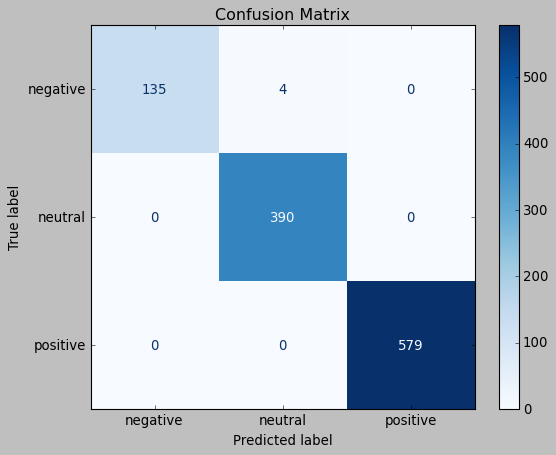

In [87]:
import pandas as pd
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("Artificial_Intelligence.csv")

# Display column names
print("Column names in the dataset:", df.columns.tolist())

# Use the 'content' column for text processing
text_column = 'content'

# Initialize VADER for sentiment classification
sia = SentimentIntensityAnalyzer()

# Function to classify sentiment based on VADER
def classify_sentiment(text):
    score = sia.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'positive'
    elif score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment classification
df['sentiment'] = df[text_column].fillna('').apply(classify_sentiment)

# Vectorize text data
vectorizer = TfidfVectorizer(max_features=5000, strip_accents='unicode', stop_words='english')
X_text = vectorizer.fit_transform(df[text_column])  # Do NOT convert to dense array

# Combine all features
X = X_text
y = df['sentiment']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier with regularization (smoothing)
alpha = 0.1
model = MultinomialNB(alpha=alpha)
model.fit(X_train, y_train)

# Predict on the test set
y_test_pred = model.predict(X_test)

# Evaluate the model
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Testing Accuracy: {test_accuracy}")
print("Testing Classification Report:")
print(classification_report(y_test, y_test_pred))

# Visualizations
## Confusion Matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.show()

# Decision Tree Classifier Model

Column names in the dataset: ['date', 'user', 'content', 'id', 'replyCount', 'retweetCount', 'likeCount', 'quoteCount', 'hashtags', 'lang', 'links', 'media']
Cross-Validation Accuracy: 76.95%
Testing Accuracy: 73.10%
Testing Classification Report:
              precision    recall  f1-score   support

    negative       0.98      0.38      0.55       139
     neutral       0.66      0.70      0.68       390
    positive       0.76      0.84      0.79       579

    accuracy                           0.73      1108
   macro avg       0.80      0.64      0.67      1108
weighted avg       0.75      0.73      0.72      1108



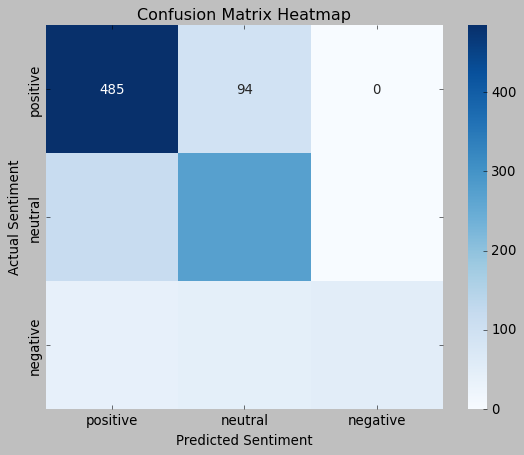

In [95]:
import pandas as pd
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("Artificial_Intelligence.csv")

# Display column names
print("Column names in the dataset:", df.columns.tolist())

# Use the 'content' column for text processing
text_column = 'content'

# Initialize VADER for sentiment classification
sia = SentimentIntensityAnalyzer()

# Function to classify sentiment based on VADER
def classify_sentiment(text):
    score = sia.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'positive'
    elif score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment classification
df['sentiment'] = df[text_column].fillna('').apply(classify_sentiment)

# Vectorize text data
vectorizer = TfidfVectorizer(max_features=5000, strip_accents='unicode', stop_words='english')
X_text = vectorizer.fit_transform(df[text_column])

# Features and labels
X = X_text
y = df['sentiment']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Classifier with depth constraint to reduce overfitting
model = DecisionTreeClassifier(max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Cross-validation to ensure stability
cv_scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-Validation Accuracy: {np.mean(cv_scores) * 100:.2f}%")

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
test_accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Testing Accuracy: {test_accuracy:.2f}%")
print("Testing Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix with Seaborn Heatmap
conf_matrix = confusion_matrix(y_test, y_pred, labels=['positive', 'neutral', 'negative'])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='d', xticklabels=['positive', 'neutral', 'negative'], yticklabels=['positive', 'neutral', 'negative'])
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Sentiment")
plt.ylabel("Actual Sentiment")
plt.show()

# Naive Bayes Classifier Model

Testing Accuracy: 93.71%
Testing Classification Report:
              precision    recall  f1-score   support

    negative       1.00      0.86      0.93       189
     neutral       0.94      0.92      0.93       504
    positive       0.92      0.97      0.95       691

    accuracy                           0.94      1384
   macro avg       0.95      0.92      0.93      1384
weighted avg       0.94      0.94      0.94      1384



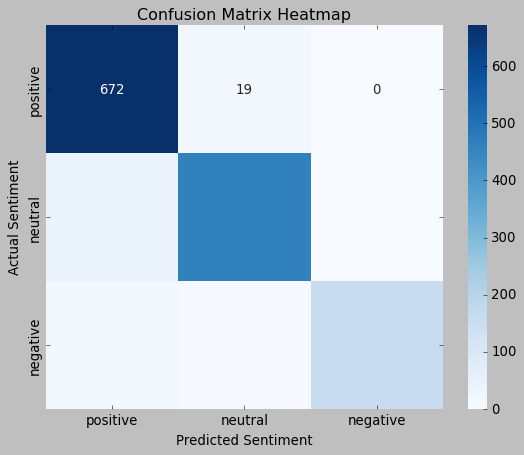

In [99]:
import pandas as pd
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("Artificial_Intelligence.csv")

# Use the 'content' column for text processing
text_column = 'content'

# Initialize VADER for sentiment classification
sia = SentimentIntensityAnalyzer()

# Function to classify sentiment based on VADER
def classify_sentiment(text):
    score = sia.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'positive'
    elif score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment classification
df['sentiment'] = df[text_column].fillna('').apply(classify_sentiment)

# Vectorize text data with fewer features
vectorizer = TfidfVectorizer(max_features=3000, strip_accents='unicode', stop_words='english')
X_text = vectorizer.fit_transform(df[text_column])

# Features and labels
X = X_text
y = df['sentiment']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Train Naive Bayes Classifier with moderate smoothing
model = MultinomialNB(alpha=1.0)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
test_accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Testing Accuracy: {test_accuracy:.2f}%")
print("Testing Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix with Seaborn Heatmap
conf_matrix = confusion_matrix(y_test, y_pred, labels=['positive', 'neutral', 'negative'])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='d', xticklabels=['positive', 'neutral', 'negative'], yticklabels=['positive', 'neutral', 'negative'])
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Sentiment")
plt.ylabel("Actual Sentiment")
plt.show()

## Library Installation

In [103]:
pip install xgboost lightgbm catboost nltk

In [104]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mhnsw\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# XGBoost Classifier

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mhnsw\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mhnsw\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mhnsw\AppData\Roaming\nltk_data...
C:\Users\mhnsw\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:32:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model Accuracy: 97.47292418772562
Classification Report:
               precision    recall  f1-score   support

    negative       0.98      0.91      0.94       167
     neutral       0.97      1.00      0.98       359
    positive       0.98      0.98      0.98       582

    accuracy                           0.97      1108
   macro avg       0.98      0.96      0.97      1108
weighted avg       0.97      0.97      0.97      1108



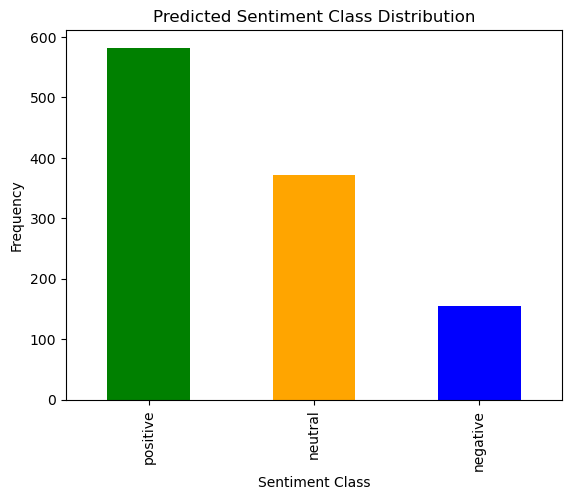

In [1]:
import pandas as pd
import nltk
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt

# Download required NLTK data
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('wordnet')

# Load the dataset
df = pd.read_csv("Artificial_Intelligence.csv")
text_column = 'content'

# Initialize VADER for sentiment classification
sia = SentimentIntensityAnalyzer()

# Preprocessing function
def preprocess_text(text):
    text = text.lower()  # Lowercasing
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    words = text.split()
    words = [word for word in words if word not in stopwords.words('english')]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]  # Lemmatization
    return ' '.join(words)

# Apply preprocessing
df[text_column] = df[text_column].fillna('').apply(preprocess_text)

# Function to classify sentiment
def classify_sentiment(text):
    score = sia.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'positive'
    elif score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment classification
df['sentiment'] = df[text_column].apply(classify_sentiment)

# Encode target labels to integers
label_encoder = LabelEncoder()
df['sentiment_encoded'] = label_encoder.fit_transform(df['sentiment'])

# Vectorize text data with bigrams and increased features
vectorizer = TfidfVectorizer(max_features=7000, stop_words='english', ngram_range=(1,2))
X = vectorizer.fit_transform(df[text_column])
y = df['sentiment_encoded']

# Split data with stratify
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# XGBoost Classifier with tuned hyperparameters
xgb_model = XGBClassifier(
    use_label_encoder=False, eval_metric='mlogloss', max_depth=7,
    n_estimators=150, learning_rate=0.07, subsample=0.9, colsample_bytree=0.8,
    min_child_weight=1, gamma=0.2, random_state=42
)
xgb_model.fit(X_train, y_train)

# Prediction
y_pred_xgb = xgb_model.predict(X_test)

# Decode predicted labels
y_pred_labels = label_encoder.inverse_transform(y_pred_xgb)
y_test_labels = label_encoder.inverse_transform(y_test)

# Evaluate
accuracy = accuracy_score(y_test_labels, y_pred_labels)
print("XGBoost Model Accuracy:", accuracy * 100)
print("Classification Report:\n", classification_report(y_test_labels, y_pred_labels))

# Visualize class distribution of predictions
class_counts = pd.Series(y_pred_labels).value_counts()
class_counts.plot(kind='bar', color=['green', 'orange', 'blue'])
plt.title("Predicted Sentiment Class Distribution")
plt.xlabel("Sentiment Class")
plt.ylabel("Frequency")
plt.show()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mhnsw\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mhnsw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mhnsw\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\mhnsw\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:34:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model Accuracy: 97.47292418772562
Classification Report:
               precision    recall  f1-score   support

    negative       0.98      0.91      0.94       167
     neutral       0.97      1.00      0.98       359
    positive       0.98      0.98      0.98       582

    accuracy                           0.97      1108
   macro avg       0.98      0.96      0.97      1108
weighted avg       0.97      0.97      0.97      1108



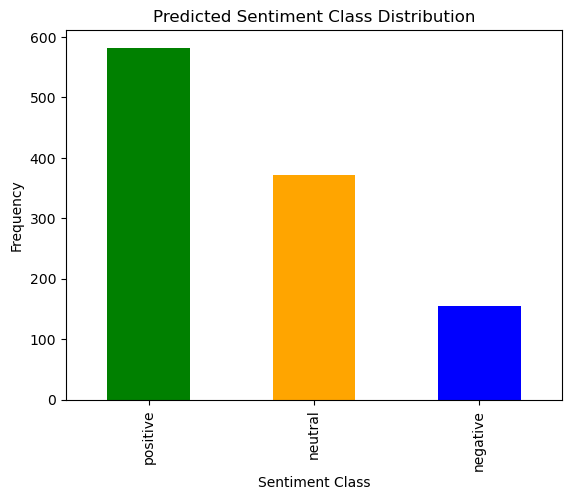

In [5]:
import pandas as pd
import nltk
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt

# Download required NLTK data
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('wordnet')

# Load the dataset
df = pd.read_csv("Artificial_Intelligence.csv")
text_column = 'content'

# Initialize VADER for sentiment classification
sia = SentimentIntensityAnalyzer()

# Preprocessing function
def preprocess_text(text):
    text = text.lower()  # Lowercasing
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    words = text.split()
    words = [word for word in words if word not in stopwords.words('english')]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]  # Lemmatization
    return ' '.join(words)

# Apply preprocessing
df[text_column] = df[text_column].fillna('').apply(preprocess_text)

# Function to classify sentiment
def classify_sentiment(text):
    score = sia.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'positive'
    elif score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment classification
df['sentiment'] = df[text_column].apply(classify_sentiment)

# Encode target labels to integers
label_encoder = LabelEncoder()
df['sentiment_encoded'] = label_encoder.fit_transform(df['sentiment'])

# Vectorize text data with bigrams and increased features
vectorizer = TfidfVectorizer(max_features=7000, stop_words='english', ngram_range=(1,2))
X = vectorizer.fit_transform(df[text_column])
y = df['sentiment_encoded']

# Split data with stratify
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# XGBoost Classifier with tuned hyperparameters
xgb_model = XGBClassifier(
    use_label_encoder=False, eval_metric='mlogloss', max_depth=7,
    n_estimators=150, learning_rate=0.07, subsample=0.9, colsample_bytree=0.8,
    min_child_weight=1, gamma=0.2, random_state=42
)
xgb_model.fit(X_train, y_train)

# Prediction
y_pred_xgb = xgb_model.predict(X_test)

# Decode predicted labels
y_pred_labels = label_encoder.inverse_transform(y_pred_xgb)
y_test_labels = label_encoder.inverse_transform(y_test)

# Evaluate
accuracy = accuracy_score(y_test_labels, y_pred_labels)
print("XGBoost Model Accuracy:", accuracy * 100)
print("Classification Report:\n", classification_report(y_test_labels, y_pred_labels))

# Visualize class distribution of predictions
class_counts = pd.Series(y_pred_labels).value_counts()
class_counts.plot(kind='bar', color=['green', 'orange', 'blue'])
plt.title("Predicted Sentiment Class Distribution")
plt.xlabel("Sentiment Class")
plt.ylabel("Frequency")
plt.show()